Preprocessing

In [1]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

data = []
labels = []
images = []
label = 0

for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        imgResized = resize(img, (1000,1000))
        images.append(imgResized)
        prep = imgResized.astype(float)
        prep = np.ndarray.flatten(prep)
        data.append(prep)
        labels.append(label)
    label+=1

In [2]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from numpy import flipud

newImages = []
newLabels = []
rotations = [90, 180, 270]
for i in range(len(images)):
    originalImage = images[i]
    for rotation in rotations:
        rotatedImage = rotate(originalImage, rotation)
        newImages.append(rotatedImage)
        newLabels.append(labels[i])
        newImages.append(flipud(rotatedImage))
        newLabels.append(labels[i])

images.extend(newImages)
labels.extend(newLabels)

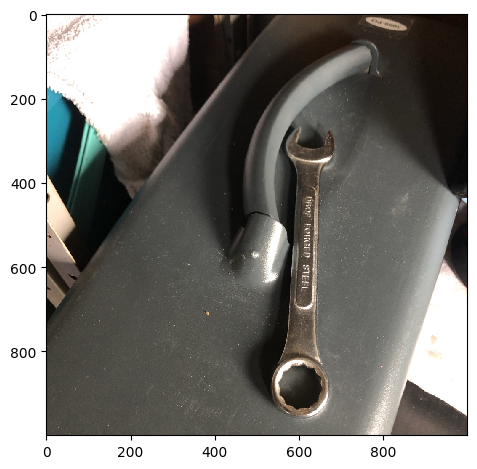

In [7]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt

image = rotate(images[0], 0)
io.imshow(image)
plt.show()

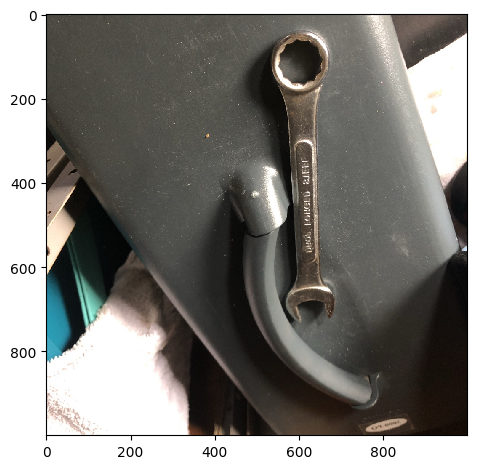

In [8]:
from numpy import flipud
image = flipud(images[0])
io.imshow(image)
plt.show()

In [ ]:
data = []
for image in images:
    data.append(np.ndarray.flatten(image))

First we make a classifier based on the not augmented data:

In [4]:
len(images)

1421

In [54]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size=0.2, random_state=2056621)

clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=2056621, max_iter=50)
clf.fit(trainData, trainLabel)

predLabel = clf.predict(testData)

classification_report(testLabel, predLabel)

C:\Anaconda\envs\ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to

'              precision    recall  f1-score   support\n\n           0       0.22      1.00      0.36         9\n           1       0.00      0.00      0.00        12\n           2       0.00      0.00      0.00        11\n           3       0.00      0.00      0.00         9\n\n    accuracy                           0.22        41\n   macro avg       0.05      0.25      0.09        41\nweighted avg       0.05      0.22      0.08        41\n'